In [1]:
import pandas as pd
import numpy as np
import numpy.typing as npt

## Generate data
To generate data we first sample from some hyper plane, defined by a hyperplane and parameters $\sigma, \mu$ for gaussion noise to be added to the output term. 
$$
  w = \begin{bmatrix} w_0, \dots w_n \end{bmatrix}
$$

In [2]:
def generate_data(w: npt.ArrayLike, mu: float, sigma: float) -> np.array:
    xs = np.random.uniform(-1, 1, size=(100, w.shape[0])) * 50
    xs[:, 0] = 1
    ys = w @ xs.T + np.random.normal(mu, sigma, 100)
    return np.c_[xs , ys]



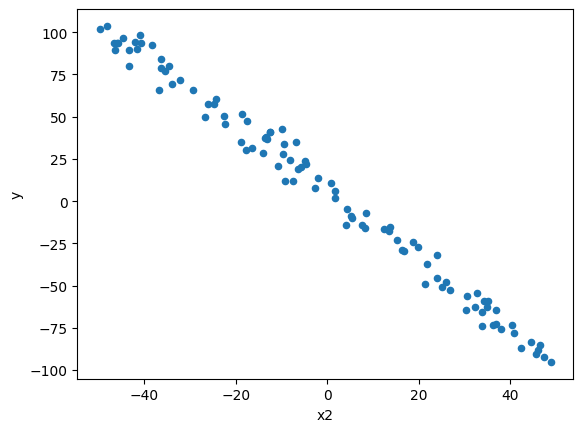

In [3]:
w = np.array([5, -2])
data = generate_data(w, 0, 7)

df = pd.DataFrame(data, columns=['x1', 'x2', 'y'])
df['y_hat'] = df[['x1', 'x2']].apply(lambda x: w @ x, axis=1)
ax = df.plot.scatter(x='x2', y='y', style='b')
# df.plot.line(x='x2', y='y_hat', ax=ax, style='b')

In [4]:
df

Error: (1,1): error CS0103: The name 'df' does not exist in the current context

In [13]:
xs = data[:, 0:2]
ys = data[:, 2]

In [14]:
sum((((w @ xs.T) - ys)) ** 2)

4076.1886050315275

In [17]:
iss, js = np.meshgrid(range(-5, 5), range(-5, 5))
zs = iss.copy()

for i in range(len(iss)):
    for j in range(len(js)):
        zs[i, j] = sum((((np.array([iss[i,j], js[i,j]]) @ xs.T)) - ys) ** 2)

In [18]:
import numpy as np
import matplotlib.pyplot as plt

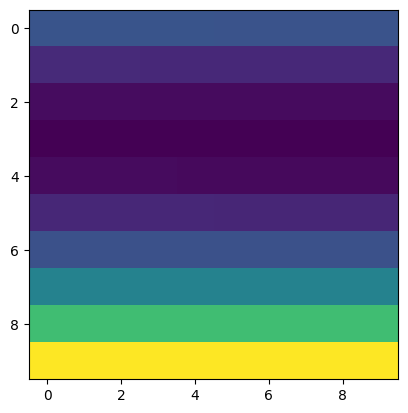

In [19]:
plt.imshow(zs)